In [44]:
import altair as alt 
alt.data_transformers.enable('json') # work-around to let Altair handle larger data sets

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

In [45]:
def shot_colors(shot):
    if 'MissedShots' == shot:
        return 'red'
    if 'blockedShots' == shot:
        return 'orange'
    if 'SavedShot' == shot:
        return 'yellow'
    if 'Goal' == shot:
        return 'green'
    else:
        return 'gray' 

In [46]:
df = pd.read_csv("players.csv")

In [47]:
df.columns

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup', 'id_player', 'GK',
       'S', 'M', 'D', 'F'],
      dtype='object')

In [48]:
df["season"] = df['id'].apply(lambda x:x.split("_")[1])

In [49]:
df[["player_name","goals"]].sort_values(by=['goals'],ascending=False)

,player_name,goals
6986,Cristiano Ronaldo,48
6987,Lionel Messi,43
2826,Robert Lewandowski,41
7509,Luis Suárez,40
11339,Zlatan Ibrahimovic,38
...,...,...
13474,Oumar Solet,0
13475,Abdallah Ndour,0
13476,Gaetan Poussin,0
13477,Rayan Ait Nouri,0


In [50]:
df[df['position'] == 'D'][["player_name","goals"]].sort_values(by=['goals'],ascending=False)[:5]

,player_name,goals
9690,Sergio Ramos,11
31,Naldo,7
18969,Mattia Caldara,7
8089,Sergio Ramos,7
17842,Gonzalo Rodríguez,7


In [51]:
alt.Chart(df[df['position'] == 'D'][["player_name","goals"]].sort_values(by=['goals'],ascending=False)).mark_bar().encode(x='player_name', y='goals:Q')

alt.Chart(...)

In [52]:
def croquis1(position, filtre="goals",year="2015"):
    tmp_df = df[df['position'] == position]
    return alt.Chart(tmp_df[["player_name",filtre]].sort_values(by=[filtre],ascending=False)[:5]).mark_bar().encode(x='player_name', y=filtre+':Q')
croquis1('D')

alt.Chart(...)

In [80]:
df["Competition"] = df.id.apply(lambda x : x.split("_")[-1])


In [83]:
columns = ['goals', 'assists', 'shots', 'xG','key_passes', "Competition" ]

select_box = alt.binding_select(options=columns, name='Filter by :')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'goals'})
selection = alt.selection_multi(fields=['Competition'], bind='legend')
color = alt.condition(selection,
                    alt.Color('Competition:N'),
                    alt.value('lightgray'))


In [93]:
source = df[df["season"] == "20-21"]
base = alt.Chart(
   source
).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel  
).mark_bar().encode(
    x=alt.X('player_name:N'),
    y=alt.Y('value:Q', sort="x"),
    tooltip=['player_name', 'games', 'goals', 'assists','xG','team_title'],
    color=color
).transform_window(
    rank='rank(value)',
    sort=[alt.SortField('value', order='descending')]
).transform_filter(
    (alt.datum.rank <30)
).add_selection(
    sel,
    selection
).properties(title = f"Best 30 players in each category")
base

alt.Chart(...)

In [94]:
with alt.data_transformers.enable('default'):
    base.save('website/best_30.html')

In [56]:
df_shots = pd.read_csv("data/players/shots_dataset.csv")


In [57]:
df_shots['year'] = pd.to_datetime(df_shots['date']).apply(lambda x:x.year)

In [58]:
df_shots[df_shots["result"] == 'Goal']

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,year
11,424188,48,Goal,0.902,0.376,0.067920,Nicolas Pepe,h,5656,OpenPlay,...,RightFoot,14805,Arsenal,Brighton,2,0,2021-05-23 15:00:00,Calum Chambers,Cross,2021
12,424191,59,Goal,0.872,0.310,0.060083,Nicolas Pepe,h,5656,OpenPlay,...,LeftFoot,14805,Arsenal,Brighton,2,0,2021-05-23 15:00:00,Martin Odegaard,Pass,2021
24,423952,42,Goal,0.866,0.538,0.058250,Bertrand Traoré,h,695,FromCorner,...,LeftFoot,14806,Aston Villa,Chelsea,2,1,2021-05-23 15:00:00,Matt Targett,Pass,2021
26,423956,51,Goal,0.885,0.500,0.761169,Anwar El Ghazi,h,5612,Penalty,...,RightFoot,14806,Aston Villa,Chelsea,2,1,2021-05-23 15:00:00,NaN,Standard,2021
43,423962,69,Goal,0.957,0.560,0.381360,Ben Chilwell,a,782,OpenPlay,...,LeftFoot,14806,Aston Villa,Chelsea,2,1,2021-05-23 15:00:00,Christian Pulisic,Cross,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359054,123909,79,Goal,0.897,0.526,0.419859,Kehinde Fatai,a,5440,OpenPlay,...,LeftFoot,2964,Arsenal Tula,FC Ufa,0,2,2016-10-30 15:30:00,Dmitri Sysuev,Pass,2016
359058,126564,25,Goal,0.929,0.464,0.517444,Aleksandr Kokorin,h,3066,SetPiece,...,RightFoot,2965,Zenit St. Petersburg,Tom Tomsk,1,0,2016-10-30 18:00:00,Artem Dzyuba,HeadPass,2016
359104,124940,61,Goal,0.897,0.479,0.133850,Artem Deljkin,h,5506,OpenPlay,...,LeftFoot,2967,FC Orenburg,Krylya Sovetov Samara,1,0,2016-10-31 18:00:00,Sergey Breev,Pass,2016
359123,123720,68,Goal,0.954,0.600,0.409207,Maksim Kanunnikov,h,2969,SetPiece,...,LeftFoot,2968,Rubin Kazan,Lokomotiv Moscow,2,0,2016-10-31 20:30:00,NaN,Rebound,2016


In [59]:
df_shots['color'] = df_shots["result"].apply(lambda x:shot_colors(x))

In [60]:
df_shots["result"].value_counts()

MissedShots    141150
BlockedShot     88743
SavedShot       83740
Goal            37556
ShotOnPost       6831
OwnGoal          1119
Name: result, dtype: int64

In [61]:
df_shots[df_shots['player'] == 'Martin Odegaard'][df_shots['year'] == 2020][['X','Y','color']]

<ipython-input-61-3ead3ce9e3db>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_shots[df_shots['player'] == 'Martin Odegaard'][df_shots['year'] == 2020][['X','Y','color']]


,X,Y,color
212247,0.854,0.579,gray
226000,0.858,0.436,gray
226001,0.718,0.681,gray
277690,0.743,0.503,red
277694,0.765,0.466,gray
277696,0.917,0.129,red
277839,0.878,0.513,red
277844,0.756,0.560,gray
278153,0.709,0.478,red
278157,0.802,0.655,yellow


<ipython-input-97-b06e1a5d806d>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df = df_shots[df_shots['player'] == player][df_shots['year'] == year][['X','Y','color']]


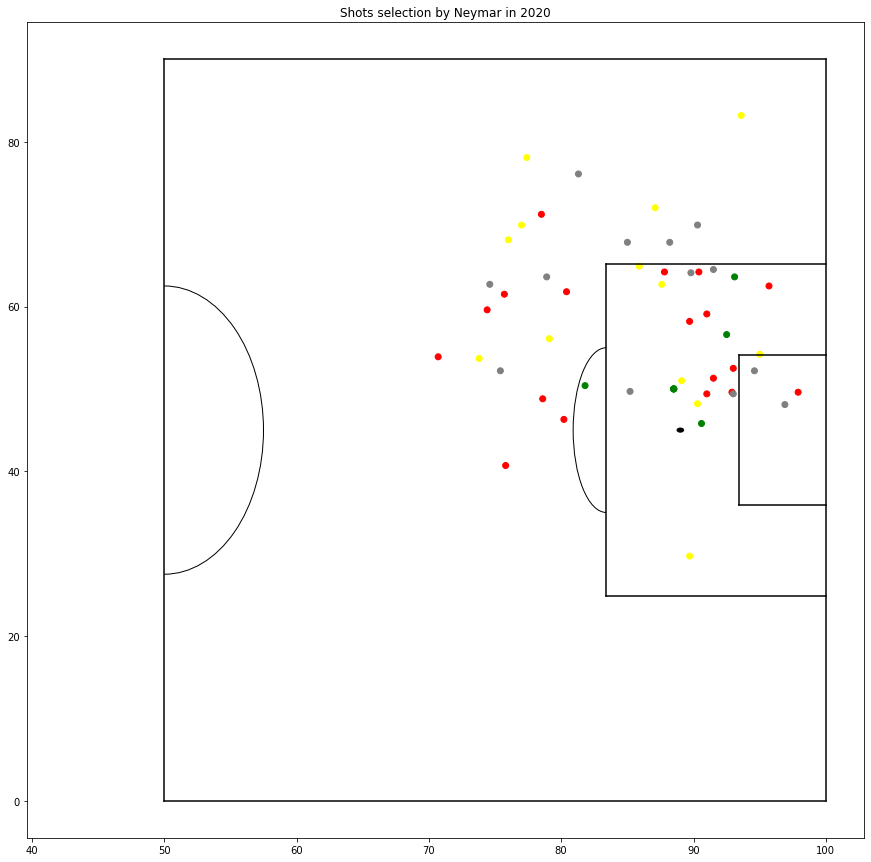

In [97]:
def drawShots(player='', year=0):
    
    fig=plt.figure(figsize=(15,15))
    
    ax=fig.add_subplot(1,1,1)

    
    # Les contours du demi-terrain
    plt.plot([50,100],[90,90], color="black")
    plt.plot([100,100],[90,0], color="black")
    plt.plot([100,50],[0,0], color="black")
    plt.plot([50,50],[0,90], color="black")
    
    # Le demi cercle
    
    arcDemi = patches.Arc((50,45),height=35,width=15,angle=0,theta1=270,theta2=90,color="black")
    
    # La zone de penalty 
    plt.plot([83.4,100],[65.15, 65.15],color="black")
    plt.plot([83.4,83.4],[24.85, 65.15],color="black")
    plt.plot([83.4,100],[24.85,24.85],color="black")

    plt.plot([83.4+10,100],[65.15-11, 65.15-11],color="black")
    plt.plot([83.4+10,100],[24.85+11,24.85+11],color="black")
    plt.plot([83.4+10,83.4+10],[24.85+11, 65.15-11],color="black")
    
    
    arcPeno = patches.Arc((83.4,45),height=20,width=5,angle=0,theta1=90,theta2=270,color="black")
    
    pointPeno = plt.Circle((89,45),0.25,color="black")
    
    ax.add_patch(arcDemi)
    ax.add_patch(arcPeno)
    ax.add_patch(pointPeno)
    tmp_df = df_shots[df_shots['player'] == player][df_shots['year'] == year][['X','Y','color']]
    X =  tmp_df['X'].values*100
    Y =  tmp_df['Y'].values*100
    colors = tmp_df['color'].values
    labels = {"green":"Goal","red":"Missed","yellow":"Blocked", "gray":"autre"}
    plt.scatter(X,Y,color=colors)
    plt.title("Shots selection by "+player+" in " + str(year))
    
map_shot = drawShots("Neymar", 2020)
map_shot